Week 10 Activity
1. Read the data into python
2. Check for null values
3. Examine the variables ‘Hardness’, ‘Sulfate’, and ‘Organic_carbon’ and
comment on your observations.
4. Carry out correlation analysis on the dataset and find the correlation factor
between
a. ph and Chloramines b. ph and Conductivity
What do we infer from this correlation value?

In [12]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
data = pd.read_csv('week10.csv')

In [14]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771
1,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
2,5.584087,188.313324,28748.68774,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708
3,10.223862,248.071735,28749.71654,7.513408,393.663395,283.651634,13.789695,84.603556,2.672989
4,8.635849,203.361523,13672.09176,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425


In [15]:
data.shape

(2011, 9)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2011 non-null   float64
 1   Hardness         2011 non-null   float64
 2   Solids           2011 non-null   float64
 3   Chloramines      2011 non-null   float64
 4   Sulfate          2011 non-null   float64
 5   Conductivity     2011 non-null   float64
 6   Organic_carbon   2011 non-null   float64
 7   Trihalomethanes  2011 non-null   float64
 8   Turbidity        2011 non-null   float64
dtypes: float64(9)
memory usage: 141.5 KB


In [38]:
#checking for null values 
data.isna().sum()  #found no outliers

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64

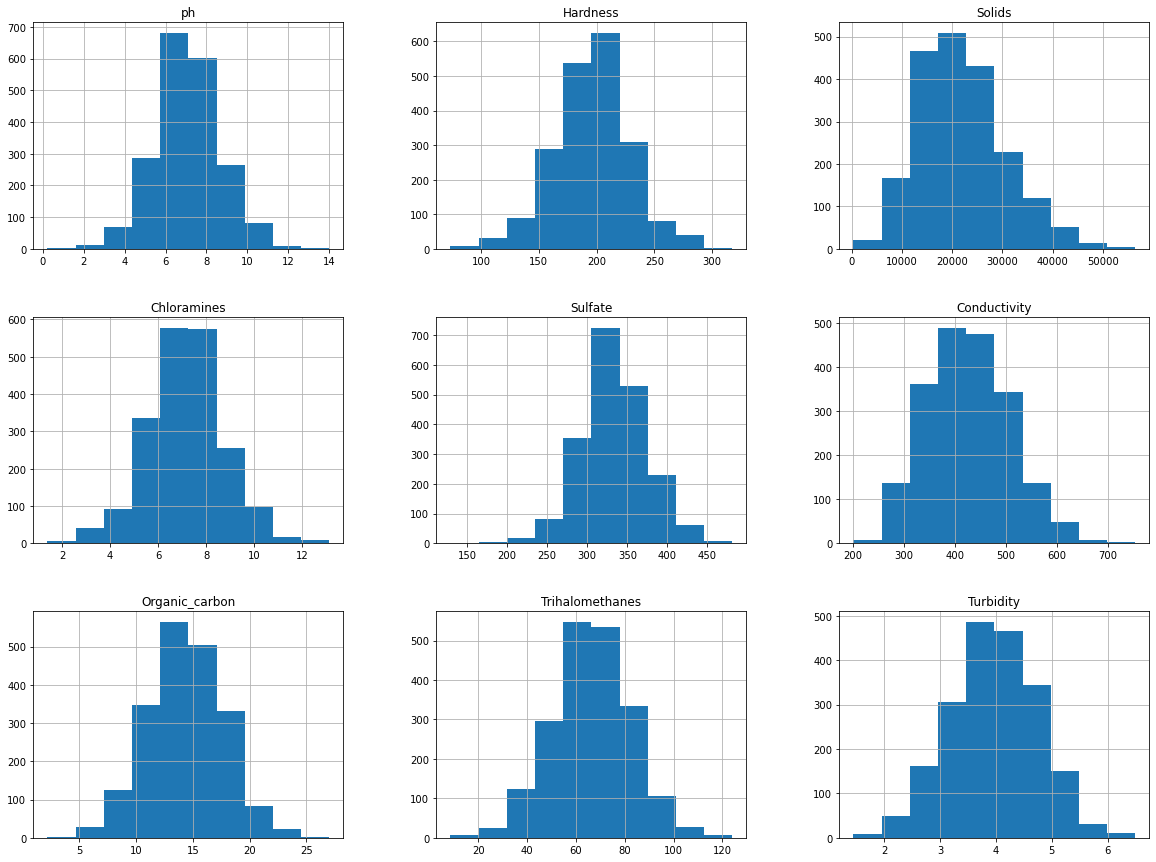

In [19]:
#Examine the variables ‘Hardness’, ‘Sulfate’, and ‘Organic_carbon’ and comment on your observations.
data.hist(figsize = (20,15))
plt.show()

‘Hardness’, ‘Sulfate’, and ‘Organic_carbon’ all have normal distribution 

In [45]:
print(data['Hardness'].unique())
print(data['Sulfate'].unique())
print(data['Organic_carbon'].unique())

[214.3733941  181.1015092  188.3133238  ...  94.81254522 186.6590397
 193.6817355 ]
[356.8861356 310.1357375 326.6783629 ... 258.9306004 345.7002573
 359.9485744]
[18.4365245  11.55827944  8.39973464 ... 16.17275544 12.06761957
 13.89441852]


In [20]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000
mean,7.085990,195.968072,21917.441375,7.134338,333.224672,426.526409,14.357709,66.400859,3.969729
std,1.573337,32.635085,8642.239815,1.584820,41.205172,80.712572,3.324959,16.077109,0.780346
min,0.227499,73.492234,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000
25%,6.089723,176.744938,15615.665390,6.138895,307.632511,366.680307,12.124105,55.952664,3.442915
50%,7.027297,197.191839,20933.512750,7.143907,332.232177,423.455906,14.322019,66.542198,3.968177
75%,8.052969,216.441070,27182.587065,8.109726,359.330555,482.373169,16.683049,77.291925,4.514175
max,14.000000,317.338124,56488.672410,13.127000,481.030642,753.342620,27.006707,124.000000,6.494749


‘Hardness’, ‘Sulfate’, and ‘Organic_carbon’ are continous numeric variables. 

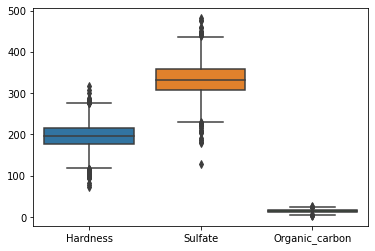

In [37]:
sns.boxplot(data=data[['Hardness', 'Sulfate','Organic_carbon' ]])
plt.show()

There are outliers for hardness and sulphate. 

# Carry out correlation analysis on the dataset and find the correlation factor between
a. ph and Chloramines <br>
b. ph and Conductivity <br>

<AxesSubplot:>

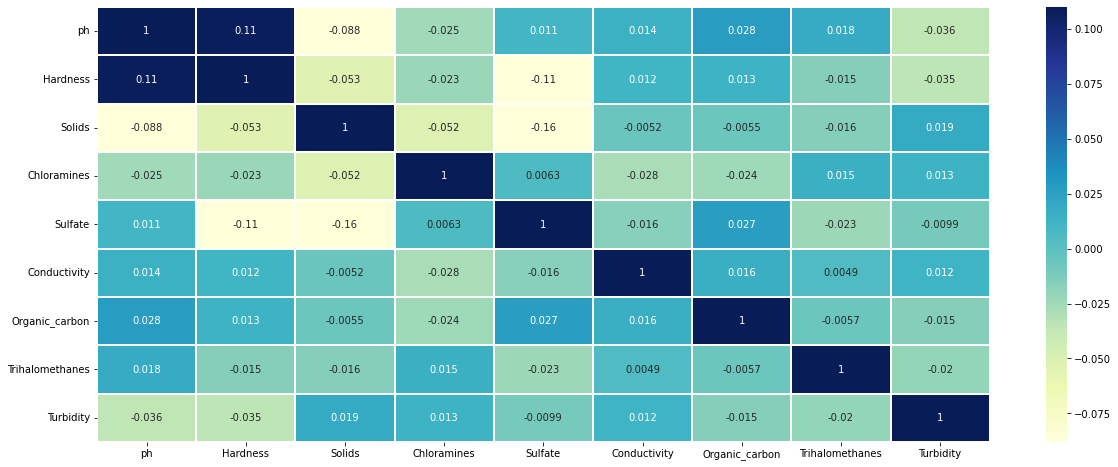

In [33]:
corrmatrix = data.corr()
plt.subplots(figsize = (20,8))
sns.heatmap(corrmatrix,vmin= -0.088,vmax = 0.11,annot=True,linewidth = 0.2,cmap='YlGnBu')

 ph and Chloramines has a low negative corelation of -0.025 <br>
 ph and Conductivity has a low corelation of 0.014<br>
 
 PH is not highly correlated to Chloramines and conductivity and these features should be selection for creating the model. 

In [49]:
#Another way to find out correlation using scipy 
import scipy 
from scipy.stats.stats import pearsonr

ph = data['ph']
ch = data['Chloramines']
co = data['Conductivity']

pearson_coefficent, p_value = pearsonr(ph,ch)
print('Pearson Coorelation Coefficent between ph and Chloramines: %0.3f'%pearson_coefficent)
pearson_coefficent, p_value = pearsonr(ph,co)
print('Pearson Coorelation Coefficent between ph and Conductivity : %0.3f'%pearson_coefficent)

Pearson Coorelation Coefficent between ph and Chloramines: -0.025
Pearson Coorelation Coefficent between ph and Conductivity : 0.014
